In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Complete Workflow 

In [ ]:
# Import packages 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

fp = os.path.join('data', 'Spill_Incidents_20251102.csv')
spills = pd.read_csv(fp) # Spills Data 


fp =os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp) # County Data

# Now we clean spills up for merging
spills.columns = spills.columns.str.lower().str.replace(' ', '_') # Essentially janitor::clean_names

# And make it a datetime
spills['spill_date'] = pd.to_datetime(spills['spill_date']) # Make spill date datetime

# Now make a new variable which is petroleum spills between January and October 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') & 
                 (spills['spill_date'] >= pd.to_datetime('2023-01-01')) & 
                 (spills['spill_date'] <= pd.to_datetime('2023-10-31'))]

# Now we take that and aggregate the amount of spills
spills_per_county = petr_23.groupby('county', as_index=False).agg({'material_family':'count'})

# And change the column names
spills_per_county = spills_per_county.rename(columns={"material_family": "n_spills"})

# Now lets do some more editing to get these spills ready for some merging
spills_per_county.loc[spills_per_county['county']== 'St Lawrence', 'county'] = 'St. Lawrence'

# Next we simplify the column names of counties
counties.columns = counties.columns.str.lower()

# And select for New York Counties 
ny_counties = counties[(counties['statefp'] == '36')]

# And rename the name column
ny_counties = ny_counties.rename(columns = {'name':'county'})

# And finally merge
ny_counties = pd.merge( ny_counties, spills_per_county, on= 'county', how='inner')

# That merge got rid of a spill in Tuscarora Indian Reservation so lets assign that spill to Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara',['n_spills']]+=1

# And finally plot 

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
ny_counties.plot(
    ax=ax,
    column='n_spills', # Color by the number of spills
    cmap='inferno_r', # Use reverse inferno colors
    legend=True,
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7, # Make the legend smaller
        "pad": 0.05,
        'label':'Number of Spills'
    })

# Add title and subtitle for better context
ax.set_title('Petroleum Spills in New York Counties January - October 2023',
             fontsize=18,
             weight='bold', 
             pad=15)

plt.show()

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/petervitale910/eds220-hwk3-petervitale


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
fp = os.path.join('data', 'Spill_Incidents_20251102.csv')
spills = pd.read_csv(fp) # Spills Data 


fp =os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp) # County Data


ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [4]:
#a. Check the dataframe's head
print(f'Top five rows of spills dataset:\n {spills.head(5)}')



Top five rows of spills dataset:
    Spill Number Program Facility Name                  Street 1 Street 2  \
0        107132                MH 864        RT 119/MILLWOOD RD      NaN   
1        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
2        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
3        204667            POLE 16091       GRACE AVE/BURKE AVE      NaN   
4        210559               POLE ON  FERDALE LOMIS RD / RT 52      NaN   

   Locality       County ZIP Code  SWIS Code  DEC Region  Spill Date  \
0  ELMSFORD  Westchester      NaN       6000           3  10/10/2001   
1    QUEENS       Queens      NaN       4101           2  08/21/2004   
2    QUEENS       Queens      NaN       4101           2  08/21/2004   
3     BRONX        Bronx      NaN        301           2  08/02/2002   
4   LIBERTY     Sullivan      NaN       5336           3  01/20/2003   

  Received Date Contributing Factor   Waterbody                 Source  \
0 

In [5]:
#b. Check the data types of the columns
print(f' Types in spill data:\n {spills.dtypes}')

 Types in spill data:
 Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object


In [6]:
#c. Check the unique values in the `material_family` column
print(f'The unique values in the material_family is:\n {spills["Material Family"].unique()}')


The unique values in the material_family is:
 ['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [7]:
#d. Check the unique values in the `county` column
print(f'\nThe unique values in the county column is {spills["County"].nunique()} values:\n{spills["County"].unique()}')


The unique values in the county column is 87 values:
['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'Schuyler' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex'
 'Chenango' 'Erie' 'Livingston' 'Oneida' 'Wayne' 'Suffolk' 'Orleans'
 'Ontario' 'Genesee' 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca'
 'Broome' 'Hamilton' 'Washington' 'Steuben' 'Rensselaer' 'Franklin'
 'Columbia' 'Fulton' 'Herkimer' 'Schoharie' 'Montgomery' 'Putnam'
 'Delaware' 'New Jersey - Region 2' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania

e. In the basic exploration we looked at the head, types, and some of our unique values. The head shows that we are looking at 21 columns and shows that we need to work a bit with the column names to get them into any shape to plot. We then examined the datatypes which showed that some of our columns, particularly `Spill Date`, are not in the right format. We then looked at the unique values in the `Material Family` column to see what types of spills are encoded, since we only care about petroleum. Next we look at the values in the `County` column to later be able to merge with the `counties` dataset. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [8]:
spills.columns = spills.columns.str.lower().str.replace(' ', '_') # Essentially janitor::clean_names

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [9]:
spills['spill_date'] = pd.to_datetime(spills['spill_date']) # Make spill date datetime

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
spills.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,2001-10-10,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,2004-08-21,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,2002-08-02,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,2003-01-20,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [11]:
# Now make a new variable which is petroleum spills between January and October 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') & 
                 (spills['spill_date'] >= pd.to_datetime('2023-01-01')) & 
                 (spills['spill_date'] <= pd.to_datetime('2023-10-31'))]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
print(f' The petr_23 dataset contains {petr_23["material_family"].unique()} data spanning {petr_23["spill_date"].dt.month_name().unique()} in the year {petr_23["spill_date"].dt.year.unique()}')

 The petr_23 dataset contains ['Petroleum'] data spanning ['June' 'August' 'September' 'July' 'January' 'February' 'March' 'October'
 'May' 'April'] in the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
assert petr_23["material_family"].unique() == 'Petroleum'

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# Now we take that and aggregate the amount of spills
spills_per_county = petr_23.groupby('county', as_index=False).agg({'material_family':'count'})

# And change the column names
spills_per_county = spills_per_county.rename(columns={"material_family": "n_spills"})

In [16]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [17]:
# a 
print(f'Top five rows in counties dataset:')
counties.head()

Top five rows in counties dataset:


,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [18]:
# b
print(f'Types in county data:\n {counties.dtypes}')

Types in county data:
 STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [19]:
# c
print(f'The crs of the counties data frame is: {counties.crs}')

The crs of the counties data frame is: EPSG:4269


<Axes: >

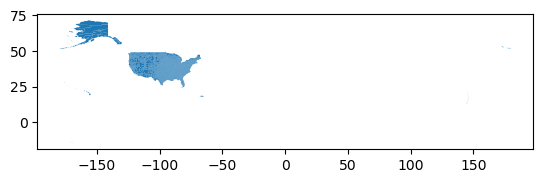

In [20]:
# d
counties.plot()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [21]:
counties.columns = counties.columns.str.lower()

In [22]:
counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [23]:
ny_counties = counties[(counties['statefp'] == '36')]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [24]:
print(f'The county names in `counties` are: \n {np.sort(ny_counties["name"].unique())}')

The county names in `counties` are: 
 ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [25]:
print(f'The county names in `spills_per_county` are:\n {np.sort(spills_per_county["county"].unique())}')

The county names in `spills_per_county` are:
 ['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [26]:
diff_names_spills = list(np.setdiff1d(spills_per_county["county"], ny_counties["name"]))
diff_names_spills


['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [27]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [28]:
diff_names_ny = list(np.setdiff1d(ny_counties["name"], spills_per_county["county"] ))
diff_names_ny

['St. Lawrence']

In [29]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [30]:
spills_per_county[(spills_per_county["county"] == 'Tuscarora Indian Reservation')]

,county,n_spills
56,Tuscarora Indian Reservation,1


In [31]:
# e. 
print(f'The number of spills in `Tuscarora Indian Reservation` is:\n {spills_per_county.loc[(spills_per_county["county"] == "Tuscarora Indian Reservation"), ["n_spills"]].reset_index(drop=True)}')

The number of spills in `Tuscarora Indian Reservation` is:
    n_spills
0         1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [32]:
spills_per_county.loc[spills_per_county['county']== 'St Lawrence', 'county'] = 'St. Lawrence'
spills_per_county[spills_per_county['county']== 'St Lawrence']

,county,n_spills


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [33]:
ny_counties = ny_counties.rename(columns = {'name':'county'})

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [34]:
ny_counties = pd.merge( ny_counties, spills_per_county, on= 'county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [35]:
ny_counties.loc[ny_counties['county'] == 'Niagara',['n_spills']]+=1

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



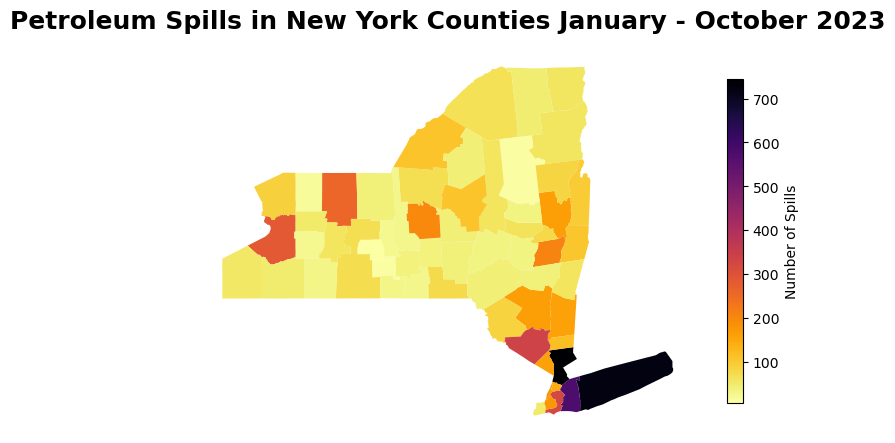

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='inferno_r',
    legend=True,
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "pad": 0.05,
        'label':'Number of Spills'
    })

# Add title and subtitle for better context
ax.set_title('Petroleum Spills in New York Counties January - October 2023',
             fontsize=18,
             weight='bold', 
             pad=15)

plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

To create the map of petroleum spills by New York Counties I started by aggregating New York Data by petroleum spills and then merged that dataset with shape data from california counties. From the plot we can see a large disparity between Long Island compared to other counties. One possible explanation for the disparity could be due to the watersheds in the state. According to a New York Watershed south New York is connected to other parts of the state, leading to spills trickling down towards the Atlantic [Watershed Report, 2021](https://wtny.us/watersheds-with-the-flow-july19-25-report.asp). Furthermore the southern counties have a higher population density, which is known to lead to a higher quantity of hazardous spills. 

## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [51]:
spills_per_county = petr_23.groupby('county', as_index=False).agg({'material_family':'count'})
spills_per_county = spills_per_county.rename(columns={"material_family": "n_spills"})

In [52]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results: All test cases passed!